### Problem 1

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import sympy as sy
from sympy import lambdify
import math

In [2]:
# define f(x)
def f(x):
    return (np.sin(x) + 1) ** (np.sin(np.cos(x)))
# take symbolic derivative with respect to x and lambdify the resulting function
def f_prime(X): 
    def symbols():
        x = sy.symbols('x')
        f = (sy.sin(x) + 1) ** (sy.sin(sy.cos(x))) 
        f_prime = sy.diff(f, x)
        return sy.lambdify(x, f_prime)
    return symbols()(X)

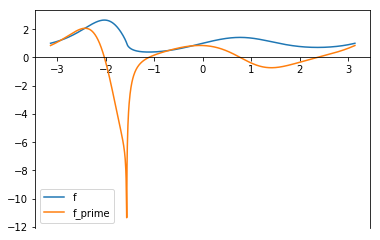

In [3]:
# plot f and its derivative f′ over the domain [−π,π]
x_domain = np.linspace(-np.pi, np.pi, 1000)

ax = plt.gca()
ax.spines["bottom"].set_position("zero")

ax.plot(x_domain, f(x_domain), label='f')
ax.plot(x_domain, f_prime(x_domain), label='f_prime')

ax.legend()

### Problem 2

In [4]:
# define a function for each of the finite difference quotients
def forward_1(x, h=0.01):
    return (f(x + h) - f(x)) / h
def forward_2(x, h=0.01):
    return (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)
def backward_1(x, h=0.01):
    return (f(x) - f(x - h)) / h
def backward_2(x, h=0.01):
    return (3 * f(x) - 4 * f(x - h) + f(x - 2 * h)) / (2 * h)
def centered_2(x, h=0.01):
    return (f(x + h) - f(x - h)) / (2 * h)
def centered_4(x, h=0.01):
    return (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)

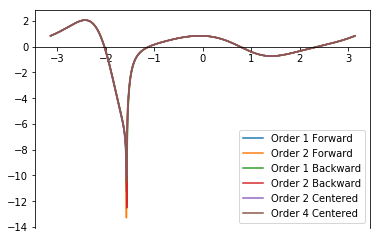

In [5]:
# plot the finite difference quotients for approximating f′(x0)
x_domain = np.linspace(-math.pi, math.pi, 1000)

ax = plt.gca()
ax.spines["bottom"].set_position("zero")

ax.plot(x_domain, forward_1(x_domain), label='Order 1 Forward')
ax.plot(x_domain, forward_2(x_domain), label='Order 2 Forward')
ax.plot(x_domain, backward_1(x_domain), label='Order 1 Backward')
ax.plot(x_domain, backward_2(x_domain), label='Order 2 Backward')
ax.plot(x_domain, centered_2(x_domain), label='Order 2 Centered')
ax.plot(x_domain, centered_4(x_domain), label='Order 4 Centered')

ax.legend()

### Problem 3

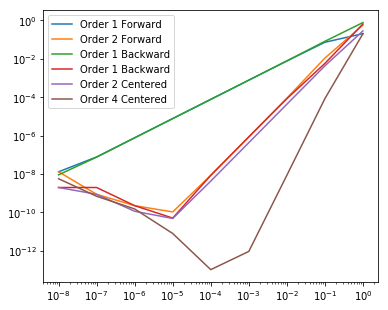

In [6]:
def absolute_error(x):
    h = np.logspace(-8, 0, 9)
    ax = plt.figure(figsize=(6,5)).gca()
    ax.loglog(h, abs(forward_1(x,h) - f_prime(x)),label='Order 1 Forward')
    ax.loglog(h, abs(forward_2(x, h) - f_prime(x)),label='Order 2 Forward')
    ax.loglog(h, abs(backward_1(x, h) - f_prime(x)),label='Order 1 Backward')
    ax.loglog(h, abs(backward_2(x, h) - f_prime(x)),label='Order 1 Backward')
    ax.loglog(h, abs(centered_2(x, h) - f_prime(x)),label='Order 2 Centered')
    ax.loglog(h, abs(centered_4(x, h) - f_prime(x)),label='Order 4 Centered')
    ax.legend()

absolute_error(1)

### Problem 4

In [7]:
import warnings
warnings.filterwarnings("ignore")

# load the data
import pandas as pd
df = pd.DataFrame(np.load('plane.npy'), columns=['t','alpha','beta'])
df.head()

,t,alpha,beta
0,7.0,56.25,67.54
1,8.0,55.53,66.57
2,9.0,54.80,65.59
3,10.0,54.06,64.59
4,11.0,53.34,63.62


In [8]:
# convert to radians
df['alpha'] = np.deg2rad(df['alpha'])
df['beta'] = np.deg2rad(df['beta'])
df.head()

,t,alpha,beta
0,7.0,0.981748,1.178795
1,8.0,0.969181,1.161866
2,9.0,0.956440,1.144761
3,10.0,0.943525,1.127308
4,11.0,0.930959,1.110378


In [9]:
# compute the coordinates
df['xt'] = 500 * np.tan(df['beta']) / (np.tan(df['beta']) - np.tan(df['alpha']))
df['yt'] = 500 * np.tan(df['beta']) * np.tan(df['alpha']) / (np.tan(df['beta']) - np.tan(df['alpha']))
df.head()

,t,alpha,beta,xt,yt
0,7.0,0.981748,1.178795,1311.271337,1962.456239
1,8.0,0.969181,1.161866,1355.936476,1975.114505
2,9.0,0.956440,1.144761,1401.918398,1987.346016
3,10.0,0.943525,1.127308,1450.497006,2000.840713
4,11.0,0.930959,1.110378,1498.640350,2013.512411


In [10]:
df['xt_prime'] = 0
df['yt_prime'] = 0

# using a forward difference quotient for t = 7
df['xt_prime'][0] =  df['xt'][1] - df['xt'][0]
df['yt_prime'][0] =  df['yt'][1] - df['yt'][0]

# using a backward difference quotient for t = 14
df['xt_prime'][7] =  df['xt'][7] - df['xt'][6]
df['yt_prime'][7] =  df['yt'][7] - df['yt'][6]

# using a centered difference quotient for t = 8, 9, . . . , 13
for t in range(1, 7):
    df['xt_prime'][t] =  (df['xt'][t + 1] - df['xt'][t - 1]) / 2
    df['yt_prime'][t] =  (df['yt'][t + 1] - df['yt'][t - 1]) / 2
df.head()

,t,alpha,beta,xt,yt,xt_prime,yt_prime
0,7.0,0.981748,1.178795,1311.271337,1962.456239,44,12
1,8.0,0.969181,1.161866,1355.936476,1975.114505,45,12
2,9.0,0.956440,1.144761,1401.918398,1987.346016,47,12
3,10.0,0.943525,1.127308,1450.497006,2000.840713,48,13
4,11.0,0.930959,1.110378,1498.640350,2013.512411,46,12


In [11]:
# compute the values of the speed
df['speed'] = np.sqrt(df['xt_prime'] ** 2 + df['yt_prime'] ** 2)
df.head()

,t,alpha,beta,xt,yt,xt_prime,yt_prime,speed
0,7.0,0.981748,1.178795,1311.271337,1962.456239,44,12,45.607017
1,8.0,0.969181,1.161866,1355.936476,1975.114505,45,12,46.572524
2,9.0,0.956440,1.144761,1401.918398,1987.346016,47,12,48.507731
3,10.0,0.943525,1.127308,1450.497006,2000.840713,48,13,49.729267
4,11.0,0.930959,1.110378,1498.640350,2013.512411,46,12,47.539457


### Problem 5

In [12]:
def HighDim(g, p, h):
    n = len(g)
    m = len(p)
    J = np.zeros((n, m))
    I = np.identity(m)
    for i, fun in enumerate(g):
        for j, pt in enumerate(p):
            func = sy.lambdify((x, y), fun, 'numpy')
            xleft = pt - h * I[:,j]
            xright = pt + h * I[:,j]
            J[i, j] = (func(xright[0], xright[1]) - func(xleft[0], xleft[1])) / (2 * h)
    return J

In [13]:
x = sy.Symbol('x')
y = sy.Symbol('y')

g = [x ** 2, x ** 3-y]
p=[1,1]
h=0.01
HighDim(g, p, h)

array([[ 2.    ,  0.    ],
       [ 3.0001, -1.    ]])

### Problem 7

In [14]:
import time
from autograd import numpy as anp 
from autograd import grad

def Time(N): 
    Time1 = np.zeros(N,dtype='float')
    Time2 = np.zeros(N,dtype='float')
    Time3 = np.zeros(N,dtype='float')
    Error1 = 1e-18*np.ones(N,dtype='float')
    Error2 = np.zeros(N,dtype='float')
    Error3 = np.zeros(N,dtype='float')
    dg = grad(lambda x: (anp.sin(x) + 1) ** (anp.sin(anp.cos(x))) )
    for i in range(N):
        xp = np.random.uniform(low=-np.pi, high=np.pi)
        time_begin_1 = time.clock()
        rv1 = f_prime(xp)
        time_end_1 = time.clock()
        Time1[i] = time_end_1 - time_begin_1
        
        time_begin_2 = time.clock()
        rv2 = centered_4(xp)
        time_end_2 = time.clock()
        Time2[i] = time_end_2 - time_begin_2
        Error2[i] = abs(rv2 - rv1)
        
        time_begin_3 = time.clock()
        rv3 = dg(xp)
        time_end_3 = time.clock()
        Time3[i] = time_end_3-time_begin_3
        Error3[i] = abs(rv3 - rv1)
    
    ax = plt.figure(figsize=(10,8)).gca() 
    ax.loglog(Time1,Error1,'ro',label='Sympy',color='blue') 
    ax.loglog(Time2,Error2,'ro',label='Difference Quotients',color='orange') 
    ax.loglog(Time3,Error3,'ro',label='Autograd',color='green') 
    ax.legend()
    return

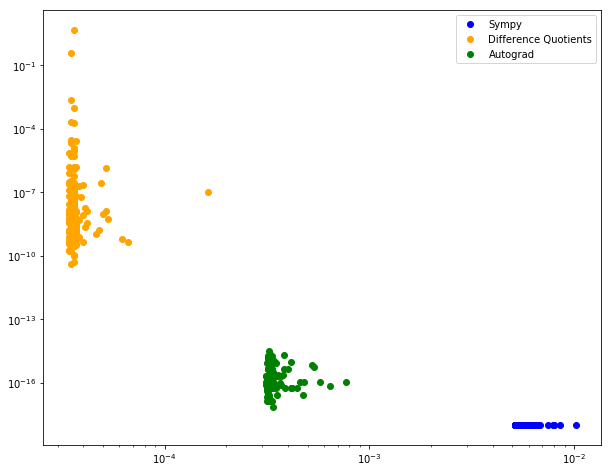

In [15]:
Time(300)